In [2]:
from mySpotify import searchSong
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

data = pd.read_csv("data.csv")
input_text = "hello"
songData = searchSong(input_text)

data = data.drop(columns=["year"])

dict_keys(['name', 'artist', 'album', 'popularity', 'explicit', 'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'])


In [33]:
song_cluster_pipeline = Pipeline([("scaler", StandardScaler()), ("kmeans", KMeans(n_clusters=20, verbose=False))], verbose=False)
X = data.select_dtypes(np.number)
number_cols = list(X.columns)
song_cluster_pipeline.fit(X)
song_cluster_labels = song_cluster_pipeline.predict(X)
data["cluster_label"] = song_cluster_labels
pca_pipeline = Pipeline([("scaler", StandardScaler()), ("PCA", PCA(n_components=2))])
song_embedding = pca_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=["x", "y"], data=song_embedding)

c:\Users\krott\Documents\[Github]\assistance-systems-recommendation-system\Leander\musicRecommenderVenv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [37]:
XHead = X.head(2)
outputPlotPoints = pca_pipeline.fit_transform(XHead)
outputPlotPoints

array([[-3.60555128e+00,  3.84592537e-16],
       [ 3.60555128e+00,  3.84592537e-16]])

In [18]:
# X.head()
firstValue = X.iloc[0]
firstValue = dict(firstValue)

print(firstValue)


# print(songData)
# print(firstValue)

different_keys = set(songData.keys()) ^ set(firstValue.keys())
# Print the different keys
print("Different keys:", different_keys)


print("=====================================")

for key, value in firstValue.items():
    # print(key, value)
    if key in songData:
        print(f"{key} | songData: {songData[key]}")
    else:
        print(f"[{key} is not in songData]")


songData["time_signature"]


# for s in firstValue:
#     print(s)

{'valence': 0.0594, 'acousticness': 0.982, 'danceability': 0.279, 'duration_ms': 831667.0, 'energy': 0.211, 'explicit': 0.0, 'instrumentalness': 0.878, 'key': 10.0, 'liveness': 0.665, 'loudness': -20.096, 'mode': 1.0, 'popularity': 4.0, 'speechiness': 0.0366, 'tempo': 80.954}
Different keys: {'name', 'artist', 'album'}
valence | songData: 0.288
acousticness | songData: 0.33
danceability | songData: 0.578
duration_ms | songData: 295502
energy | songData: 0.43
explicit | songData: False
instrumentalness | songData: 0
key | songData: 5
liveness | songData: 0.0854
loudness | songData: -6.134
mode | songData: 0
popularity | songData: 76
speechiness | songData: 0.0305
tempo | songData: 78.991


KeyError: 'time_signature'

In [38]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

data = pd.read_csv("data.csv")
song_cluster_pipeline = Pipeline([("scaler", StandardScaler()), ("kmeans", KMeans(n_clusters=20, verbose=False))], verbose=False)
X = data.select_dtypes(np.number)
number_cols = list(X.columns)
song_cluster_pipeline.fit(X)
song_cluster_labels = song_cluster_pipeline.predict(X)
data["cluster_label"] = song_cluster_labels

pca_pipeline = Pipeline([("scaler", StandardScaler()), ("PCA", PCA(n_components=2))])
song_embedding = pca_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=["x", "y"], data=song_embedding)
projection["title"] = data["name"]
projection["cluster"] = data["cluster_label"]



c:\Users\krott\Documents\[Github]\assistance-systems-recommendation-system\Leander\musicRecommenderVenv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


diff keys: {'album'}


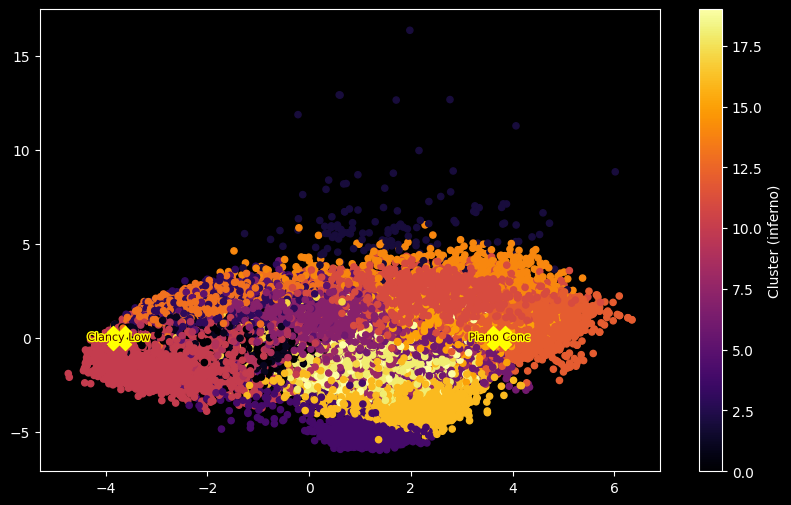

In [77]:
plt.style.use("dark_background")
plt.figure(figsize=(10, 6))
cmap = "inferno"
dot_size = 20
scatter = plt.scatter(projection["x"], projection["y"], c=projection["cluster"], cmap=cmap, s=dot_size)

##NEW
XHead = X.head(2)
Dict0 = dict(XHead.iloc[0])


Dict1 = {
    "album": "Scorpion",
    "popularity": 86,
    "explicit": True,
    "duration_ms": 198973,
    "year": "2018",
    "danceability": 0.754,
    "energy": 0.449,
    "key": 7,
    "loudness": -9.211,
    "mode": 1,
    "speechiness": 0.109,
    "acousticness": 0.0332,
    "instrumentalness": 8.29e-05,
    "liveness": 0.552,
    "valence": 0.357,
    "tempo": 77.169,
}

print(f"diff keys: {set(Dict0.keys()) ^ set(Dict1.keys())}")
# {"release_date", "artists", "id", "name"}

# Dict1.pop("release_date")
# Dict1.pop("artists")
Dict1.pop("album")
# Dict1.pop("a")
# Dict1.pop("name")
# Dict1 = dict(XHead.iloc[1])

turnItBack = pd.DataFrame([Dict0, Dict1])

XHead = turnItBack


outputPlotPoints = pca_pipeline.fit_transform(XHead)
outputPlotPoints
##NEW
myData = data.head(len(XHead))

for i, plotPoint in enumerate(outputPlotPoints):
    plt.scatter(plotPoint[0], plotPoint[1], c="yellow", s=300, marker="X")
    # XHead.index[i]
    dataI = myData.iloc[i]
    dataI = dict(dataI)
    # print(dataI)
    songName = dataI["name"]
    # truncate songName
    songName = songName[:10]
    plt.text(plotPoint[0], plotPoint[1], songName, color="#430000", fontsize=8, ha="center", va="center", path_effects=[pe.withStroke(linewidth=2, foreground="yellow")])


cbar = plt.colorbar(scatter, label=f"Cluster ({cmap})")


# plt.show()
imageName = f"kNearestSkLearn{cmap}4.png"
plt.savefig(imageName)
os.startfile(imageName)

ValueError: could not convert string to float: 'Scorpion'

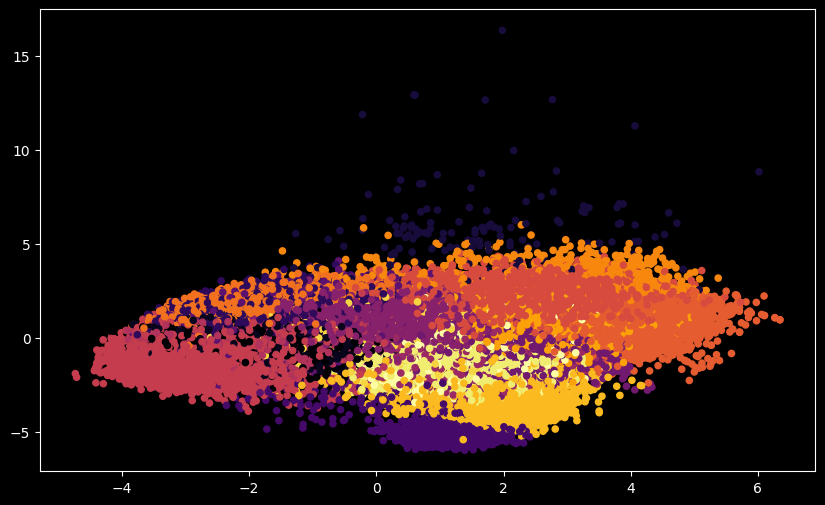

In [71]:
import matplotlib.patheffects as pe

plt.style.use("dark_background")
plt.figure(figsize=(10, 6))
cmap = "inferno"
dot_size = 20
scatter = plt.scatter(projection["x"], projection["y"], c=projection["cluster"], cmap=cmap, s=dot_size)


def plotPointWithText(x, y, text):
    plt.text(x, y, text, color="#430000", fontsize=8, ha="center", va="center", path_effects=[pe.withStroke(linewidth=2, foreground="yellow")])
    plt.scatter(x, y, c="yellow", s=300, marker="X")


songNameInput = "Gods Plan"

result = {
    "album": "Scorpion",
    "popularity": 86,
    "explicit": True,
    "duration_ms": 198973,
    "year": "2018",
    "danceability": 0.754,
    "energy": 0.449,
    "key": 7,
    "loudness": -9.211,
    "mode": 1,
    "speechiness": 0.109,
    "acousticness": 0.0332,
    "instrumentalness": 8.29e-05,
    "liveness": 0.552,
    "valence": 0.357,
    "tempo": 77.169,
}



# print

XInput = pd.DataFrame([result])
XInputPoints = pca_pipeline.fit_transform(XInput)
# outputPlotPoints
simmilarSongData = song_cluster_pipeline.predict(X)

# songNameInput
# plt.text(XInputPoints[0], XInputPoints[1], songNameInput, color="#430000", fontsize=8, ha="center", va="center", path_effects=[pe.withStroke(linewidth=2, foreground="yellow")])
plotPointWithText(XInputPoints[0], XInputPoints[1], songNameInput)

print(simmilarSongData)


# ##NEW
# XHead = X.head(10)
# outputPlotPoints = pca_pipeline.fit_transform(XHead)
# outputPlotPoints
# ##NEW


# myData = data.head(len(XHead))

# for i, plotPoint in enumerate(outputPlotPoints):
#     plt.scatter(plotPoint[0], plotPoint[1], c="yellow", s=300, marker="X")
#     # XHead.index[i]
#     dataI = myData.iloc[i]
#     dataI = dict(dataI)
#     # print(dataI)
#     songName = dataI["name"]
#     # truncate songName
#     songName = songName[:10]
#     plt.text(plotPoint[0], plotPoint[1], songName, color="#430000", fontsize=8, ha="center", va="center", path_effects=[pe.withStroke(linewidth=2, foreground="yellow")])


cbar = plt.colorbar(scatter, label=f"Cluster ({cmap})")


# plt.show()
imageName = f"kNearestSkLearn{cmap}5.png"
plt.savefig(imageName)

os.startfile(imageName)

In [67]:
from mySpotify import searchSong

myData = data.head(1)

# print(myData.info())


for i, plotPoint in enumerate(outputPlotPoints):
    dataI = myData.iloc[i]
    dataI = dict(dataI)
    # print(dataI)
    # print(dataI["name"])
    songName = dataI["name"]
    songName = "hello"
    print(dataI)
    print(songName)
    
    searched = searchSong(songName)

    print(searched)
    
    
    print(dataI.keys())
    print(searched.keys())
    
    difference = set(dataI.keys()) ^ set(searched.keys())
    print(difference)

    # print(len(dataI))

# print(len(XHead))

{'valence': 0.0594, 'year': 1921, 'acousticness': 0.982, 'artists': "['Sergei Rachmaninoff', 'James Levine', 'Berliner Philharmoniker']", 'danceability': 0.279, 'duration_ms': 831667, 'energy': 0.211, 'explicit': 0, 'id': '4BJqT0PrAfrxzMOxytFOIz', 'instrumentalness': 0.878, 'key': 10, 'liveness': 0.665, 'loudness': -20.096, 'mode': 1, 'name': 'Piano Concerto No. 3 in D Minor, Op. 30: III. Finale. Alla breve', 'popularity': 4, 'release_date': '1921', 'speechiness': 0.0366, 'tempo': 80.954, 'cluster_label': 14}
hello


KeyError: 'tracks'

In [69]:
firstValue = X.iloc[0]
firstValue = dict(firstValue)

result = {
    "name": "Piano Concerto No. 3 in D Minor, Op. 30: III. Finale. Alla breve",
    "artist": "Sergei Rachmaninoff",
    "album": "Rachmaninoff: The Piano Concertos & Paganini Rhapsody",
    "popularity": 29,
    "explicit": False,
    "duration_ms": 866933,
    "danceability": 0.326,
    "energy": 0.296,
    "key": 7,
    "loudness": -16.007,
    "mode": 0,
    "speechiness": 0.0328,
    "acousticness": 0.966,
    "instrumentalness": 0.884,
    "liveness": 0.0395,
    "valence": 0.103,
    "tempo": 96.878,
    "time_signature": 4,
}

different_keys = set(result.keys()) ^ set(firstValue.keys())

print("Different keys:", different_keys)

# {"name", "artist", "time_signature", "album", "year"}
{"name", "artist", "time_signature", "album"}


for d in different_keys:
    # print(d)
    print(result[d])
    print(result.pop(d, None))

different_keys = set(result.keys()) ^ set(firstValue.keys())

print("Different keys:", different_keys)

Different keys: {'name', 'artist', 'time_signature', 'album', 'year'}
Piano Concerto No. 3 in D Minor, Op. 30: III. Finale. Alla breve
Piano Concerto No. 3 in D Minor, Op. 30: III. Finale. Alla breve
Sergei Rachmaninoff
Sergei Rachmaninoff
4
4
Rachmaninoff: The Piano Concertos & Paganini Rhapsody
Rachmaninoff: The Piano Concertos & Paganini Rhapsody


KeyError: 'year'